In [10]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess
from method_comparison import validation_plotting as vp


In [11]:
## parameters
aug_data_path = f"{os.getcwd()}/../data/single_cell_data/augmented_kang_data/"
res_data_path = f"{os.getcwd()}/../results/single_cell_data/buddiM2_kang/"
cibersort_genes_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_phenoclasses.CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_refsample.bm.K999.txt"

# cibersort results
cibersort_file_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job18_Results.csv"

# bp results
bp_res_path = f"{os.getcwd()}/../results/single_cell_data/bp_kang/"

# DiffExp results
de_res_path = f"{os.getcwd()}/../data/single_cell_data/kang_rybakov/kang_DE_paper.tsv"

num_genes = 7000


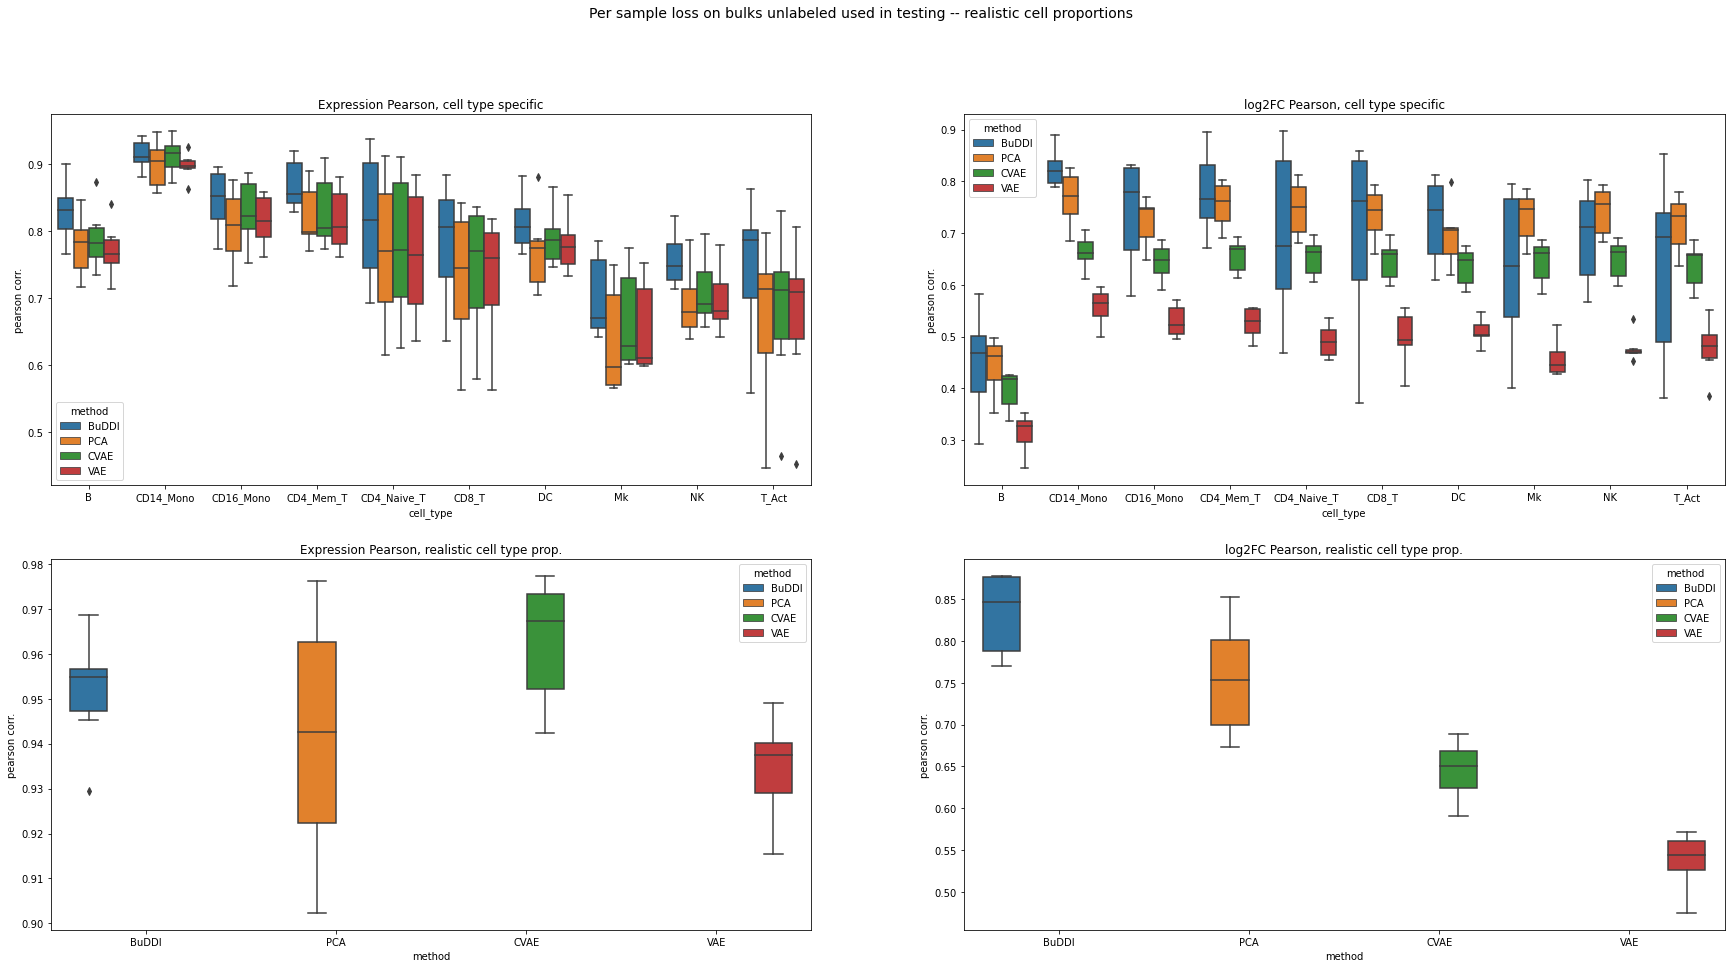

In [12]:
exp_type = "mono-kang"

buddi_file = os.path.join(res_data_path, f"{exp_type}_pearson_matr.csv")
pca_file = os.path.join(res_data_path, f"{exp_type}_pearson_PCA.csv")
cvae_file = os.path.join(res_data_path, f"{exp_type}_pearson_CVAE.csv")
vae_file = os.path.join(res_data_path, f"{exp_type}_pearson_VAE.csv")

buddi_df = pd.read_csv(buddi_file, sep=",")
pca_df = pd.read_csv(pca_file, sep=",")
cvae_df = pd.read_csv(cvae_file, sep=",")
vae_df = pd.read_csv(vae_file, sep=",")


# format the corr
buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
pca_df["method"] = ["PCA"]*pca_df.shape[0]
cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]
vae_df["method"] = ["VAE"]*vae_df.shape[0]

plot_df = pd.concat([buddi_df, pca_df, cvae_df, vae_df])



# plot
fig, axs = plt.subplots(2, 2, figsize=(30,15))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="expr_r2",
            hue="method", ax= axs[0,0])
axs[0,0].set_title("Expression Pearson, cell type specific")
axs[0,0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2",
            hue="method", ax= axs[0,1])
axs[0,1].set_title("log2FC Pearson, cell type specific")
axs[0,1].set(ylabel="pearson corr.")



sns.boxplot(data=plot_df[plot_df["bulk_type"] == "realistic"], 
            x="method", y="expr_r2",
            hue="method", ax= axs[1,0])
axs[1,0].set_title("Expression Pearson, realistic cell type prop.")
axs[1,0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "realistic"], 
            x="method", y="log2FC_r2",
            hue="method", ax= axs[1,1])
axs[1,1].set_title("log2FC Pearson, realistic cell type prop.")
axs[1,1].set(ylabel="pearson corr.")


fig.suptitle("Per sample loss on bulks unlabeled used in testing -- realistic cell proportions", fontsize=14)

fig.show()

In [13]:
plot_df

,sample_id,cell_type,bulk_type,expr_r2,log2FC_r2,method
0,101,B,cell_type_specific,0.832653,0.442507,BuDDI
1,101,CD14_Mono,cell_type_specific,0.907435,0.826746,BuDDI
2,101,CD16_Mono,cell_type_specific,0.895179,0.815734,BuDDI
3,101,CD4_Mem_T,cell_type_specific,0.858561,0.757986,BuDDI
4,101,CD4_Naive_T,cell_type_specific,0.692894,0.586699,BuDDI
...,...,...,...,...,...,...
61,1016,NaN,realistic,0.938658,0.571987,VAE
62,1039,NaN,realistic,0.936164,0.552010,VAE
63,107,NaN,realistic,0.915489,0.563053,VAE
64,1244,NaN,realistic,0.948949,0.521870,VAE
